In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import warnings
warnings.filterwarnings('ignore')


air_data = pd.read_csv("Data/final_dataset.csv")
air_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0


In [2]:
#Add 'Delay Sum' column to dataframe & preview
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


air_data['delay_sum'] = air_data[col_list].sum(axis=1)
air_data.head()


,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [3]:
#Group data by air carrier and sum total number of flights for each
airline_groups = air_data.groupby(['carrier_name'])['total_number_flights']
airline_flighttotals = airline_groups.sum()

airline_df_totalflights = airline_flighttotals.reset_index()
airline_df_totalflights

,carrier_name,total_number_flights
0,Alaska Airlines Inc.,283834.0
1,Allegiant Air,108362.0
2,American Airlines Inc.,1007390.0
3,Delta Air Lines Inc.,1052155.0
4,Endeavor Air Inc.,272236.0
5,Envoy Air,347095.0
6,ExpressJet Airlines Inc.,96553.0
7,ExpressJet Airlines LLC,64292.0
8,Frontier Airlines Inc.,137723.0
9,Hawaiian Airlines Inc.,90619.0


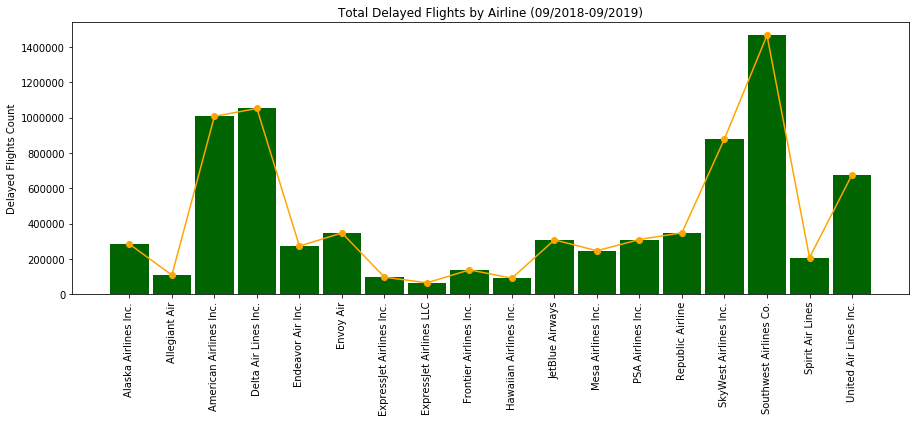

In [4]:
#Bar chart summarizing the total delays by major US airline (top 18)

fig, ax = plt.subplots(figsize=(15,5))

x_axis = airline_df_totalflights["carrier_name"]
y_axis = airline_df_totalflights["total_number_flights"]

plt.bar(x_axis, y_axis,color="darkgreen", align="center", width=.9)
plt.plot(x_axis, y_axis,'-o',color="orange")
plt.xticks(rotation=90)

ax.set_ylabel('Delayed Flights Count')
ax.set_title('Total Delayed Flights by Airline (09/2018-09/2019)')

#Save fig
plt.savefig("Charts_final/Delayed_Flights_Tot_Airline.png")

In [5]:
#Create dataframe for sum of delays by airline
airline_delaygroups = air_data.groupby(['carrier_name'])['delay_sum','total_number_flights']

airline_delaytotals = airline_delaygroups.sum()

airline_df_delayflights = airline_delaytotals.reset_index()
airline_df_delayflights["delay_percentage"] = (airline_df_delayflights["delay_sum"]/ airline_df_delayflights['total_number_flights'])*100

airline_df_delayflights.head()

,carrier_name,delay_sum,total_number_flights,delay_percentage
0,Alaska Airlines Inc.,54606.07,283834.0,19.238735
1,Allegiant Air,22592.54,108362.0,20.849135
2,American Airlines Inc.,236426.01,1007390.0,23.469164
3,Delta Air Lines Inc.,152270.24,1052155.0,14.472225
4,Endeavor Air Inc.,53556.07,272236.0,19.672663


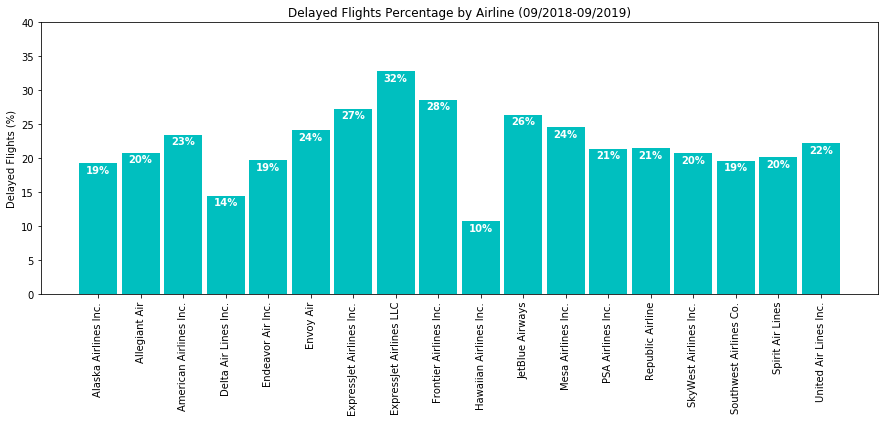

In [6]:
#Summary bar chart of flight delays by airline, presented as a percentage of total flights for each
fig, ax = plt.subplots(figsize=(15,5))

x_axis = airline_df_delayflights["carrier_name"]
y_axis = airline_df_delayflights["delay_percentage"]

bars = ax.bar(x_axis, y_axis, color="c", align="center", width=.9)
#plt.plot(x_axis, y_axis,'-o',color="orange")

plt.xticks(rotation=90)

ax.set_ylabel('Delayed Flights (%)')
ax.set_title('Delayed Flights Percentage by Airline (09/2018-09/2019)')
plt.ylim(0, 40)


def autolabel(bars):
    
    for rect in ax.patches:
        y_value = rect.get_height() 
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.2%}".format(y_value)
        ax.text(x_value, y_value - 1, '%d' % int(y_value) + "%", 
                ha='center', va='center', color='white',weight='bold')
# Call function to implement the function calls
autolabel(bars)


#Save fig
plt.savefig("Charts_final/Delayed_Flights_Perc_Airline.png")

In [7]:
###### Aracely Code ######

# Dataframe of sum of flights by delay type
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]

delay_type = pd.DataFrame(air_data[col_list].sum(axis=0))

delay_type = delay_type.reset_index()
delay_type = delay_type.rename(columns = {'index':'delay_type'})

delay_type

,delay_type,0
0,air_carrier_delay,407869.73
1,weather_delay,51321.87
2,national_aviation_system_delay,479101.11
3,sercurity_delay,2767.63
4,aircraft_arriving_late,539121.24
5,flight_cancelled,144861.00
6,flight_diverted,20535.00


<IPython.core.display.Javascript object>


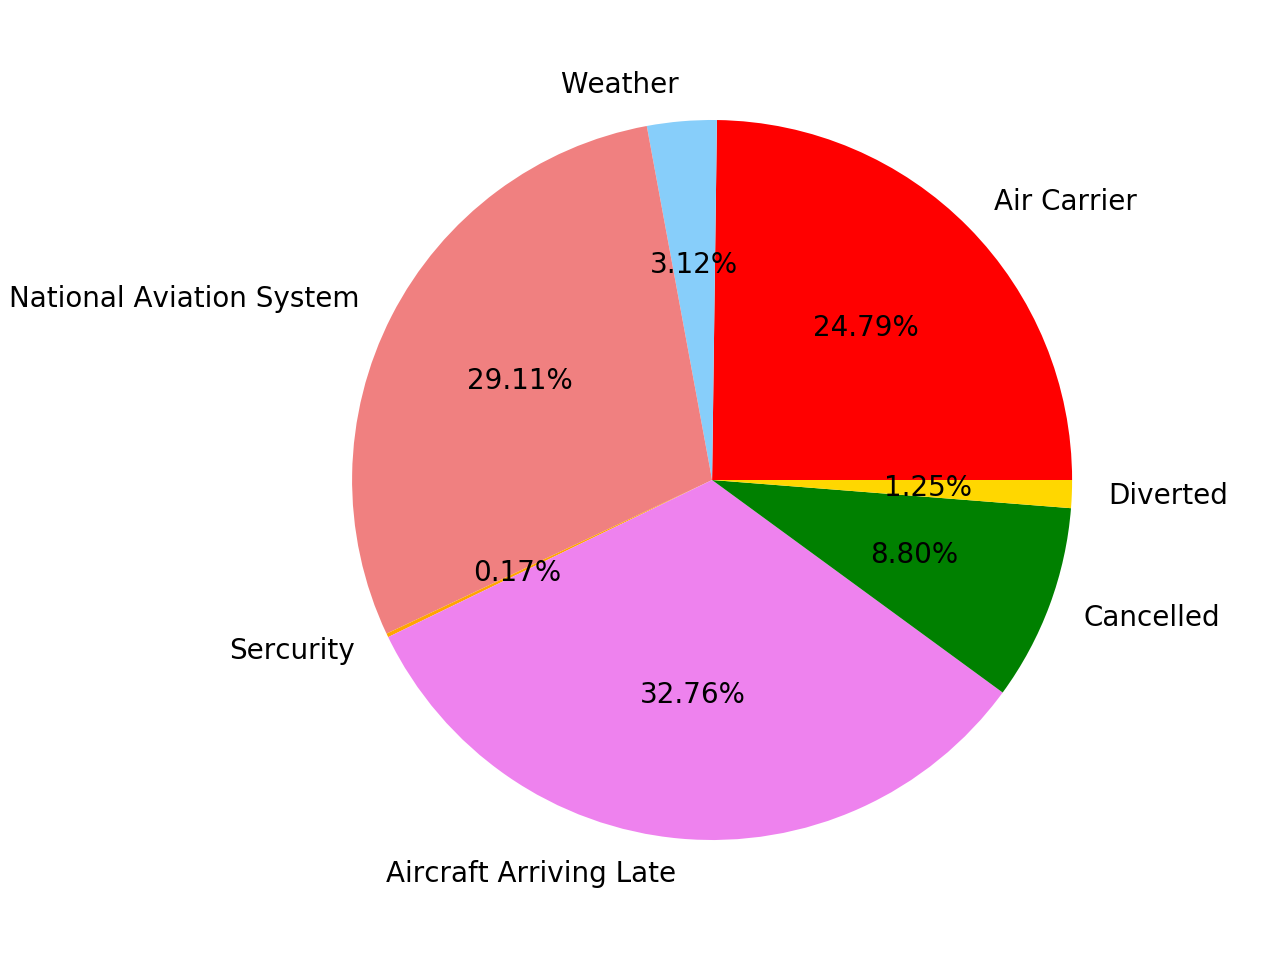

In [9]:
# Create sizes and labels for the pie chart
sizes = delay_type[0]
labels = ["Air Carrier","Weather","National Aviation System","Sercurity","Aircraft Arriving Late","Cancelled",
          "Diverted"]
colors = ["red", "lightskyblue", "lightcoral", "orange", "violet", "g", "gold"]

%matplotlib notebook
# Piechart of delay types
plt.pie(sizes, colors=colors, labels=labels,autopct="%1.2f%%")
plt.tight_layout()

#Save fig
plt.savefig("Charts_final/Type_Delayed_Flights.png")